### Import modules that will be used in process

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

import plotly.express as px

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)



from sklearn.model_selection import train_test_split, KFold, cross_val_score, LeaveOneOut
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from numpy import mean, std
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier

### Import data set (csv)

In [2]:
df = pd.read_csv("winequalityN.csv")
df.sample(5) 

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
66,white,6.4,0.26,0.24,6.4,0.040,27.0,124.0,0.99030,3.22,0.49,12.6,7
2638,white,7.5,0.13,0.38,1.1,0.023,42.0,104.0,0.99112,3.28,0.53,11.8,6
2882,white,7.0,0.24,0.30,6.7,0.039,37.0,125.0,0.99436,3.20,0.39,9.9,5
5708,red,7.3,0.49,0.10,2.6,0.068,4.0,14.0,0.99562,3.30,0.47,10.5,5
3862,white,6.5,0.27,0.19,6.6,0.045,98.0,175.0,0.99364,3.16,0.34,10.1,6


### Fill Nan values by mean

In [3]:
df.fillna(df.mean(axis=0), inplace=True)
df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Check Nan elements

In [4]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Combining fixed acidity, volatile acidity and citric acid into one variable total_acidity

Text(0, 0.5, 'total_acidity')

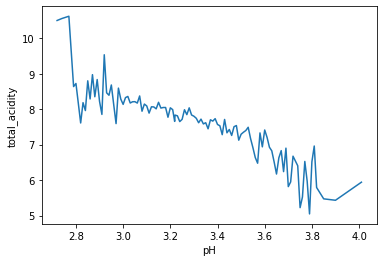

In [5]:
df["total_acidity"]= df['fixed acidity']+df['volatile acidity']+df['citric acid']
df.groupby('pH')['total_acidity'].mean().plot.line()
plt.ylabel("total_acidity")

### 1. Remove this outliers.

In [6]:
lower_limit = df["free sulfur dioxide"].mean() - 3*df["free sulfur dioxide"].std()
upper_limit = df["free sulfur dioxide"].mean() + 3*df["free sulfur dioxide"].std()
print(lower_limit,upper_limit)
df2 = df[(df["free sulfur dioxide"] > lower_limit) & (df["free sulfur dioxide"] < upper_limit)]
df.shape[0] - df2.shape[0]

-22.722879937833156 83.77351869418224


36

In [7]:
lower_limit = df2['total sulfur dioxide'].mean() - 3*df2['total sulfur dioxide'].std()
upper_limit = df2['total sulfur dioxide'].mean() + 3*df2['total sulfur dioxide'].std()
print(lower_limit,upper_limit)
df3 = df2[(df2['total sulfur dioxide'] > lower_limit) & (df2['total sulfur dioxide'] < upper_limit)]
df3.sample(5)

-53.15243132839596 283.65436601342924


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_acidity
1179,white,7.2,0.20,0.25,4.5,0.044,31.0,109.0,0.99490,3.23,0.36,9.4,5,7.65
5143,red,7.3,0.66,0.00,2.0,0.084,6.0,23.0,0.99830,3.61,0.96,9.9,6,7.96
3578,white,6.7,0.22,0.22,1.2,0.038,5.0,124.0,0.99098,3.10,0.37,11.2,4,7.14
1137,white,6.1,0.31,0.37,8.4,0.031,70.0,170.0,0.99340,3.42,0.40,11.7,8,6.78
6146,red,6.9,0.41,0.33,2.2,0.081,22.0,36.0,0.99490,3.41,0.75,11.1,6,7.64


In [8]:
df2.shape[0] - df3.shape[0]

5

In [9]:
lower_limit = df3['residual sugar'].mean() - 3*df3['residual sugar'].std()
upper_limit = df3['residual sugar'].mean() + 3*df3['residual sugar'].std()
print(lower_limit,upper_limit)
df4 = df3[(df3['residual sugar'] > lower_limit) & (df3['residual sugar'] < upper_limit)]
df4.sample(5)

-8.835863630876144 19.712440041288158


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_acidity
1830,white,7.7,0.44,0.24,11.20,0.031,41.0,167.0,0.99480,3.12,0.43,11.3,7,8.38
6115,red,8.2,0.34,0.37,1.90,0.057,43.0,74.0,0.99408,3.23,0.81,12.0,6,8.91
341,white,8.0,0.24,0.36,1.50,0.047,17.0,129.0,0.99480,3.20,0.54,10.0,6,8.60
3013,white,7.0,0.13,0.37,12.85,0.042,36.0,105.0,0.99581,3.05,0.55,10.7,6,7.50
4829,white,6.0,0.32,0.33,9.90,0.032,22.0,90.0,0.99258,3.10,0.43,12.1,7,6.65


In [10]:
df3.shape[0] - df4.shape[0]

26

In [11]:
df4.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_acidity
4518,white,9.0,0.20,0.33,3.5,0.049,10.0,40.0,0.99440,3.14,0.36,9.8,6,9.53
5592,red,9.0,0.47,0.31,2.7,0.084,24.0,125.0,0.99840,3.31,0.61,9.4,5,9.78
5181,red,8.9,0.40,0.32,5.6,0.087,10.0,47.0,0.99910,3.38,0.77,10.5,7,9.62
1924,white,7.6,0.26,0.36,1.6,0.032,6.0,106.0,0.99300,3.15,0.40,10.4,4,8.22
2751,white,6.8,0.17,0.36,1.4,0.036,38.0,108.0,0.99006,3.19,0.66,12.0,6,7.33


### 2. Replace them with max/min values, so they may contain good values for other features and this variant will save their values

In [12]:
lower_limit = df["free sulfur dioxide"].mean() - 3*df["free sulfur dioxide"].std()
upper_limit = df["free sulfur dioxide"].mean() + 3*df["free sulfur dioxide"].std()
print(lower_limit,upper_limit)
df2_repl = df


def replace_outliers(arr):
    arr = np.array(arr)
    upper = arr.mean() + 3 * arr.std()
    lower = arr.mean() - 3 * arr.std()
    arr[(arr > upper)] = upper
    arr[(arr < lower)] = lower
    return arr


df2_repl["free sulfur dioxide"] = replace_outliers(df2_repl["free sulfur dioxide"])
df2_repl["total sulfur dioxide"] = replace_outliers(df2_repl["total sulfur dioxide"])
df2_repl["residual sugar"] = replace_outliers(df2_repl["residual sugar"])

lower_limit = df2_repl["free sulfur dioxide"].mean() - 3*df2_repl["free sulfur dioxide"].std()
upper_limit = df2_repl["free sulfur dioxide"].mean() + 3*df2_repl["free sulfur dioxide"].std()
print(lower_limit,upper_limit)

-22.722879937833156 83.77351869418224
-20.77329949410528 81.55479838364607


In [13]:
# Copy datasets for 2nd way testing
df4_v2 = df4.copy()
df2_repl_v2 = df2_repl.copy()

### 1. Let's combine our target variable into two classes: low quality (3-6) and high quality (7-9)

### 1.1 for df4 (Outliers removed)

<AxesSubplot:xlabel='quality', ylabel='count'>

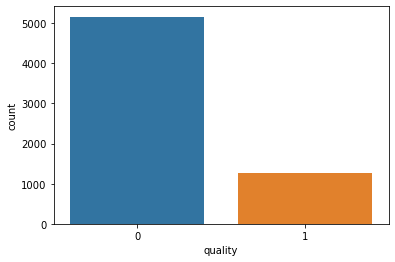

In [14]:
quaity_mapping = { 3 : 0, 4 : 0, 5: 0, 6 : 0, 7: 1, 8 : 1, 9 : 1}
df4["quality"] =  df4["quality"].map(quaity_mapping)
sns.countplot(df4['quality'])

### 1.2 for df2_repl (Outliers replaced with mean values)

In [15]:
quaity_mapping = { 3 : 0, 4 : 0, 5: 0, 6 : 0, 7: 1, 8 : 1, 9 : 1}
df2_repl["quality"] =  df2_repl["quality"].map(quaity_mapping)

<AxesSubplot:xlabel='quality', ylabel='count'>

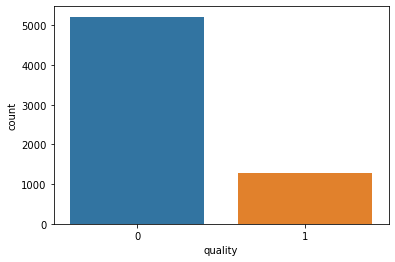

In [16]:
sns.countplot(df2_repl['quality'])

### 2. Combine our target variable into three classes: low quality (3, 4) , medium quality (5, 6, 7) and high quality (8,9)

### 2.1 for df4 (Outliers removed)

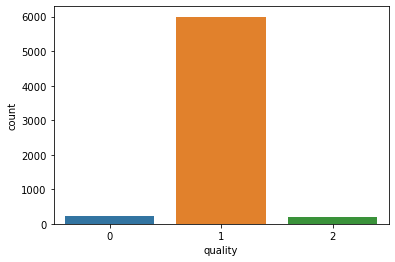

In [17]:
quality_mapping2 = {3: "Low", 4: "Low", 5: "Medium", 6: "Medium", 7:"Medium", 8: "High", 9: "High"}
df4_v2['quality'] = df4_v2['quality'].map(quality_mapping2)
quality_mapping = {"Low": 0, "Medium": 1, "High": 2}
df4_v2['quality'] = df4_v2['quality'].map(quality_mapping)
sns.countplot(df4_v2['quality']);

### 2.2 for df2_repl (Outliers replaced with mean values)

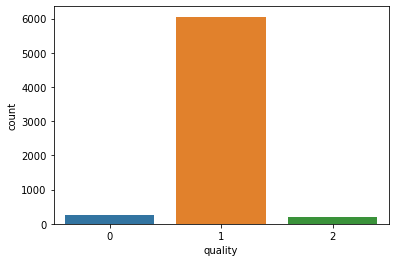

In [18]:
quality_mapping2 = {3: "Low", 4: "Low", 5: "Medium", 6: "Medium", 7:"Medium", 8: "High", 9: "High"}
df2_repl_v2['quality'] = df2_repl_v2['quality'].map(quality_mapping2)
quality_mapping = {"Low": 0, "Medium": 1, "High": 2}
df2_repl_v2['quality'] = df2_repl_v2['quality'].map(quality_mapping)
sns.countplot(df2_repl_v2['quality']);

## Now we have 4 datasets for modeling
#### 1.1) df4 (where outliers removed, quality scaled to 2 types)
#### 1.2) df2_repl (where outliers replaced with mean values, quality scaled to 2 types)
#### 2.1) df4_v2 (where outliers replaced with mean values, quality scaled to 3 types)
#### 2.2) df2_repl_v2 (where outliers replaced with mean values, quality scaled to 3 types)

# Red wine

### let's choose the features that had correlation to our target varaible: total_acidity, pH, chlorides, sulfates, alcohol

In [20]:
df_red = df4[df4["type"]=="red"]
df_red_final = df_red[["total_acidity", "chlorides", "pH", "sulphates", "alcohol", "quality"]]

In [21]:
df_red.quality.value_counts()

0    1382
1     216
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

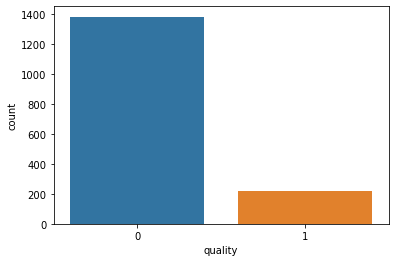

In [22]:
sns.countplot(df_red['quality'])

In [23]:
df_red2 = df4_v2[df4_v2["type"]=="red"]
df_red_final2 = df_red2[["total_acidity", "chlorides", "pH", "sulphates", "alcohol", "quality"]]

In [24]:
df_red3 = df2_repl[df2_repl["type"]=="red"]
df_red_final3 = df_red3[["total_acidity", "chlorides", "pH", "sulphates", "alcohol", "quality"]]

In [25]:
df_red3 = df2_repl_v2[df2_repl_v2["type"]=="red"]
df_red_final3 = df_red3[["total_acidity", "chlorides", "pH", "sulphates", "alcohol", "quality"]]

# <span style="color:red"> Part 2: Scikit-learn basic ML algorithms implementations</span> 

### Let's divide the dataset into features (X)  and target (y) and apply standard scaling on X in order to equalize the range differences between the features.

In [17]:
def get_dataset(dataframe):
    X = dataframe.drop("quality", axis = 1)
    y = dataframe["quality"]
    X = StandardScaler().fit_transform(X)
    return X, y

In [18]:
X, y = get_dataset(df_red_final)

In [19]:
#divide the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 1. Logistic regression

In [20]:
log_reg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
log_reg.fit(X_train,y_train) 

LogisticRegression()

### Let's predict target values for test dataset and check model accuracy

In [22]:
y_hat = log_reg.predict(X_test)

In [23]:
accuracy = metrics.accuracy_score(y_hat,y_test)
accuracy

0.859375

In [24]:
log_reg.intercept_

array([-2.53314634])

In [25]:
log_reg.coef_

array([[ 0.23486527, -0.41247031, -0.19407309,  0.5040154 ,  1.22808026]])

In [26]:
cm = confusion_matrix(y_hat,y_test)
cm

array([[267,  36],
       [  9,   8]], dtype=int64)

## 2. Cross-validation - KFold

In [27]:
# create the dataset transformation function
def fit_dataset(dataframe):
    X = dataframe.drop('quality', axis=1)
    y = dataframe['quality']
    X = StandardScaler().fit_transform(X)
    return X, y

X, y = get_dataset(df_red_final)

# retrieve the model to be evaluate
def get_model():
    model = LogisticRegression()
    return model

# evaluate the model using a given test condition
def evaluate_model(cv):
    # get the dataset
    X, y = fit_dataset(df_red_final)
    # get the model
    model = get_model()
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores), scores.min(), scores.max()

# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)

Ideal: 0.870


In [28]:
# define folds to test
folds = range(2,31)


# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)
    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)

> folds=2, accuracy=0.872 (0.864,0.881)
> folds=3, accuracy=0.871 (0.857,0.880)
> folds=4, accuracy=0.870 (0.855,0.887)
> folds=5, accuracy=0.871 (0.862,0.884)
> folds=6, accuracy=0.871 (0.853,0.884)
> folds=7, accuracy=0.871 (0.855,0.886)
> folds=8, accuracy=0.871 (0.850,0.895)
> folds=9, accuracy=0.869 (0.847,0.899)
> folds=10, accuracy=0.870 (0.849,0.894)
> folds=11, accuracy=0.870 (0.841,0.890)
> folds=12, accuracy=0.870 (0.835,0.910)
> folds=13, accuracy=0.870 (0.813,0.919)
> folds=14, accuracy=0.870 (0.825,0.896)
> folds=15, accuracy=0.870 (0.802,0.907)
> folds=16, accuracy=0.870 (0.820,0.910)
> folds=17, accuracy=0.870 (0.809,0.915)
> folds=18, accuracy=0.869 (0.820,0.910)
> folds=19, accuracy=0.870 (0.798,0.918)
> folds=20, accuracy=0.869 (0.787,0.912)
> folds=21, accuracy=0.870 (0.803,0.921)
> folds=22, accuracy=0.870 (0.767,0.917)
> folds=23, accuracy=0.869 (0.797,0.929)
> folds=24, accuracy=0.869 (0.791,0.910)
> folds=25, accuracy=0.870 (0.797,0.953)
> folds=26, accuracy=0.8

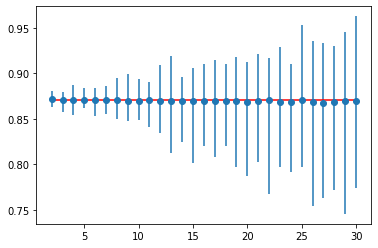

In [29]:
# line plot of k mean values with min/max error bars
plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
plt.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot

plt.show()

## 3. RandomForestClassifier

In [30]:
rf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
y_pred=rf.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       276
           1       0.73      0.50      0.59        44

    accuracy                           0.91       320
   macro avg       0.83      0.74      0.77       320
weighted avg       0.90      0.91      0.90       320



In [34]:
accuracy2 = metrics.accuracy_score(y_pred, y_test)
accuracy2

0.90625

In [35]:
cm2 = confusion_matrix(y_pred,y_test)
cm2

array([[268,  22],
       [  8,  22]], dtype=int64)

We got higher accuracy score in case of RandomForest model, so we will choose this model for predicting wine quality.

## Comparison of the results of several models

>LogisticRegression: ideal=0.870, cv=0.870
>RidgeClassifier: ideal=0.865, cv=0.865
>DecisionTreeClassifier: ideal=0.880, cv=0.876
>ExtraTreeClassifier: ideal=0.877, cv=0.870
>RandomForestClassifier: ideal=0.912, cv=0.906
Correlation: 0.989


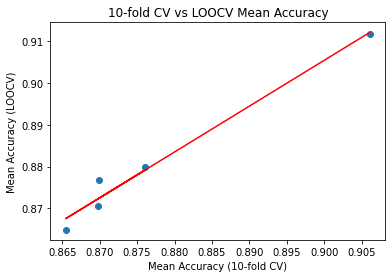

In [36]:
# correlation between test harness and ideal test condition
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
 
# create the dataset
def fit_dataset(dataframe):
    X = dataframe.drop('quality', axis=1)
    y = dataframe['quality']
    X = StandardScaler().fit_transform(X)
    return X, y

# get a list of models to evaluate
def get_models():
    models = list()
    models.append(LogisticRegression())
    models.append(RidgeClassifier())
    models.append(DecisionTreeClassifier())
    models.append(ExtraTreeClassifier())
    models.append(RandomForestClassifier())
    return models
 
# evaluate the model using a given test condition
def evaluate_model(cv, model):
    # get the dataset
    X, y = get_dataset(df_red_final)
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores)
 
# define test conditions
ideal_cv = LeaveOneOut()
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# get the list of models to consider
models = get_models()
# collect results
ideal_results, cv_results = list(), list()
# evaluate each model
for model in models:
    # evaluate model using each test condition
    cv_mean = evaluate_model(cv, model)
    ideal_mean = evaluate_model(ideal_cv, model)
    # check for invalid results
    if isnan(cv_mean) or isnan(ideal_mean):
        continue
    # store results
    cv_results.append(cv_mean)
    ideal_results.append(ideal_mean)
    # summarize progress
    print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))
# calculate the correlation between each test condition
corr, _ = pearsonr(cv_results, ideal_results)
print('Correlation: %.3f' % corr)
# scatter plot of results
pyplot.scatter(cv_results, ideal_results)
# plot the line of best fit
coeff, bias = polyfit(cv_results, ideal_results, 1)
line = coeff * asarray(cv_results) + bias
pyplot.plot(cv_results, line, color='r')
# label the plot
pyplot.title('10-fold CV vs LOOCV Mean Accuracy')
pyplot.xlabel('Mean Accuracy (10-fold CV)')
pyplot.ylabel('Mean Accuracy (LOOCV)')
# show the plot
pyplot.show()

### Here we also got higher accuracy score in case of RandomForest model, so we will choose this model for predicting wine quality.